In [13]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [14]:
# read data
spectrum_train = pd.read_excel('spectrum_train.xlsx')
spectrum_test = pd.read_excel('spectrum_valid.xlsx')
temp_train = pd.read_excel('temp_train.xlsx')
temp_test = pd.read_excel('temp_valid.xlsx')

In [15]:
# scale spectrum data
scale = 10**12
spectrum_train = spectrum_train.multiply(scale)
spectrum_test = spectrum_test.multiply(scale)

In [16]:
from sklearn.model_selection import train_test_split
# set train and test data

# 1 - temp to spectrum
# 0 - spectrum to temp
direction = 1

# use only if split == 1
# 1 - combine given training and validation data
# 0 - use only training data
combine = 0

if not combine:
    if direction:
        X_train = temp_train
        X_test = temp_test
        y_train = spectrum_train
        y_test = spectrum_test
    else:
        X_train = spectrum_train
        X_test = spectrum_test
        y_train = temp_train
        y_test = temp_test
else:
    spectrum = pd.concat([spectrum_train, spectrum_test], axis=0)
    temp = pd.concat([temp_train, temp_test], axis=0)
    if direction:
        X_train, X_test, y_train, y_test = train_test_split(temp, spectrum, test_size=0.3, random_state=101)
    else:
        X_train, X_test, y_train, y_test = train_test_split(spectrum, temp, test_size=0.3, random_state=101)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
pred = model.predict(X_test)

In [19]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, pred))
print('MSE: ', metrics.mean_squared_error(y_test, pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE:  0.11030052462094882
MSE:  0.018918266474825873
RMSE:  0.13754368933115715


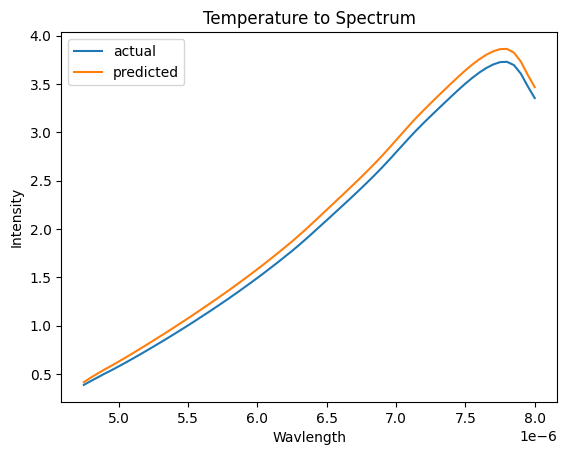

In [20]:
import matplotlib.pyplot as plt
import random

index = random.randint(0, len(pred))

actual_np = y_test.values[index]
pred_np = pred[index]


plt.plot(y_train.columns, actual_np, label='actual')
plt.plot(y_train.columns, pred_np,  label='predicted')

if direction:
    plt.title("Temperature to Spectrum")
    plt.xlabel("Wavlength")
    plt.ylabel("Intensity")
else:
    plt.title("Spectrum to Temperature")
    plt.xlabel("Layer")
    plt.ylabel("Temperature (K)")

plt.legend()
plt.show()

# Test with noisy data

In [21]:
# apply noise to validation data
noise = pd.DataFrame(np.random.normal(loc=0, scale=20, size=X_test.shape), columns=X_test.columns)

X_test_noisy = noise.add(X_test)

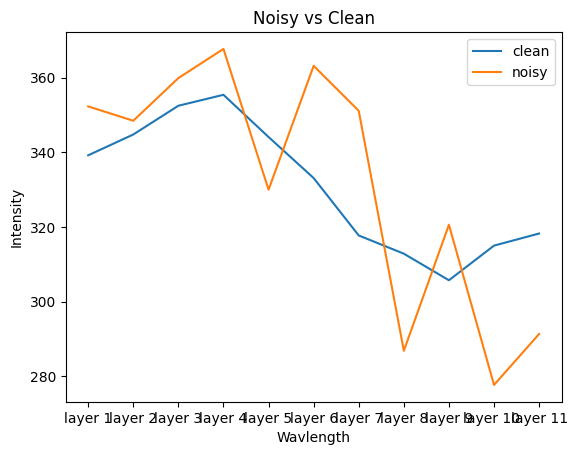

In [22]:
import matplotlib.pyplot as plt
import random

index = random.randint(0, len(pred))

clean = X_test.values[index]
noisy = X_test_noisy.values[index]


plt.plot(X_train.columns, clean, label='clean')
plt.plot(X_train.columns, noisy,  label='noisy')

plt.title("Noisy vs Clean")

if direction:
    plt.xlabel("Wavlength")
    plt.ylabel("Intensity")
else:
    plt.xlabel("Layer")
    plt.ylabel("Temperature (K)")

plt.legend()
plt.show()

In [23]:
noisy_pred = model.predict(X_test_noisy)

print('MAE: ', metrics.mean_absolute_error(y_test, noisy_pred))
print('MSE: ', metrics.mean_squared_error(y_test, noisy_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, noisy_pred)))

MAE:  137910306362.50443
MSE:  3.392843458524587e+22
RMSE:  184196727943.91833


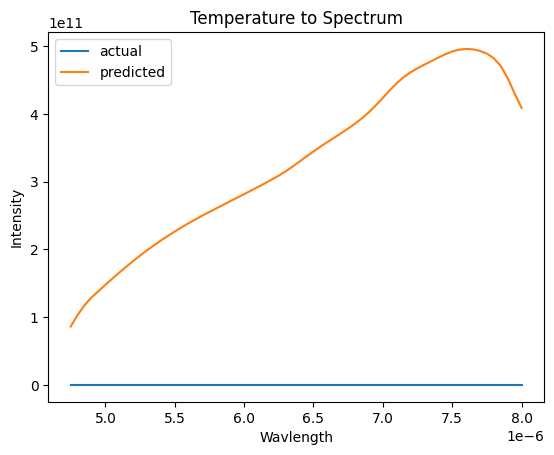

In [24]:
index = random.randint(0, len(pred))

pred_np = noisy_pred[index]


plt.plot(y_train.columns, actual_np, label='actual')
plt.plot(y_train.columns, pred_np,  label='predicted')

if direction:
    plt.title("Temperature to Spectrum")
    plt.xlabel("Wavlength")
    plt.ylabel("Intensity")
else:
    plt.title("Spectrum to Temperature")
    plt.xlabel("Layer")
    plt.ylabel("Temperature (K)")

plt.legend()
plt.show()